# Experimenting with AlphaPose extracted pose features

Within this notebook we'll explore some of the basic features and formatting of the AlphaPose results extracted for our dataset of images, which should help us get up to speed with modelling the pose features and using them for further downstream tasks.

**Date created:** 2022/01/26<br>
**Last modified:** 2022/01/26<br>
**Description:** Production of functions for exploring and experimenting with AlphaPose features.<br>
**Originator / Point of Contact:** [Ben Fraser](https://github.com/BenjaminFraser)<br>

### 1. Import dependencies, set directory paths and load data

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import random
import seaborn as sns
import skimage.io

In [26]:
sns.set_style('white')

In [50]:
# get project path and other key directories for project
PROJECT_PATH = os.sep.join(os.getcwd().split(os.sep)[:-1])
DATA_DIR = os.path.join(PROJECT_PATH, 'data')

# set paths to input images and alphapose-generate pose visualisations
IMAGE_DIR = os.path.join(DATA_DIR, 'temp_dataset')
ALPHAPOSE_RESULTS_DIR = os.path.join(DATA_DIR, 'temp_data_alphapose_results')

In [51]:
# read json results generated from the AlphaPose model
alphap_results = pd.read_json(os.path.join(DATA_DIR, 'alphapose-results.json'))

In [52]:
# preview images within our image directory
!ls {IMAGE_DIR}

example-input.png  train_1006.png     train_1015.png     train_1037.png
train_0.png        train_1007.png     train_1016.png     train_1040.png
train_1.png        train_1008.png     train_1017.png     train_1048.png
train_10.png       train_1009.png     train_1018.png     train_1065.png
train_100.png      train_101.png      train_1019.png     train_1084.png
train_1000.png     train_1010 (1).png train_102.png      train_1109.png
train_1001.png     train_1010.png     train_1020.png     train_1120.png
train_1002.png     train_1011.png     train_1021.png     train_1121.png
train_1003.png     train_1012.png     train_1022.png     train_1130.png
train_1004.png     train_1013.png     train_1023.png
train_1005.png     train_1014.png     train_1035.png


In [53]:
# get names of all unique image files in our image directory
image_files = [x for x in os.listdir(IMAGE_DIR) if x.endswith('.png')]

print(f"Number of image files found: {len(image_files)}")

Number of image files found: 42


### 2. Visualising some of our original input images:

It will be helpful to initially explore some of our original input images. Before we can do this however, we'll define some basic helper functions for image loading etc.

In [54]:
def load_image(path, convert_rgba=True):
    """Load the specified image and return a [H,W,3] Numpy array."""
    # Load image
    image = skimage.io.imread(path)
    # If grayscale. Convert to RGB for consistency.
    if image.ndim != 3:
        image = skimage.color.gray2rgb(image)
        
    # if rgba - convert to rgb for consistency
    if convert_rgba and image.shape[2] == 4:
        image = skimage.color.rgba2rgb(image)
    return image

Lets plot a random sample of images from our dataset:

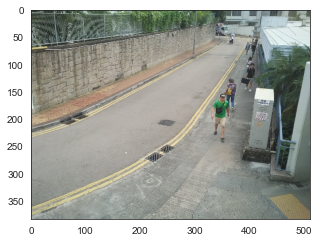

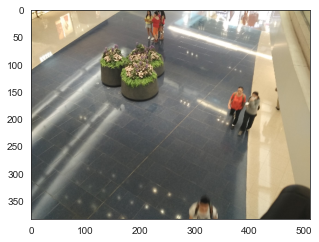

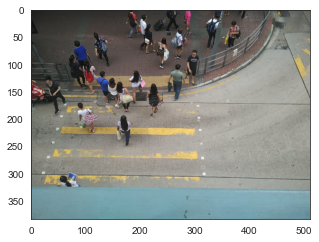

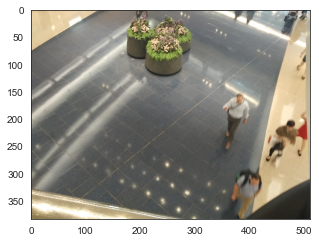

In [55]:
# lets take some sample images and plot them accordingly
sample_imgs = np.random.choice(len(image_files), 4)

# iterate through each sampled index and plot associated image
for img_index in sample_imgs:
    img_array = load_image(os.path.join(IMAGE_DIR, image_files[img_index]))
    plt.figure(figsize=(5,4))
    plt.imshow(img_array)
    plt.show()

### 3. Analysing AlphaPose Extracted Features

The JSON file generated by the AlphaPose model contains body-keypoints, confidence scores, and human bounding boxes for all people detected in a scene. After loading the data, we have one row of data per human detected in a given image, like so:

In [56]:
alphap_results

,image_id,category_id,keypoints,score,box,idx
0,example-input.png,1,"[172.47059631347656, 165.255126953125, 0.87904...",2.902318,"[161.24403381347656, 156.8895263671875, 25.761...",[0.0]
1,example-input.png,1,"[138.67724609375, 31.958463668823242, 0.603248...",2.864553,"[130.71356201171875, 25.256643295288086, 19.11...",[0.0]
2,example-input.png,1,"[315.6397399902344, 221.14999389648438, 0.8228...",2.847370,"[301.2667236328125, 212.82691955566406, 22.408...",[0.0]
3,example-input.png,1,"[450.54949951171875, 17.549545288085938, 0.770...",2.722637,"[436.6585693359375, 12.347618103027344, 23.276...",[0.0]
4,example-input.png,1,"[290.1768798828125, 225.54718017578125, 0.9003...",2.862319,"[276.7806701660156, 217.6998291015625, 23.5031...",[0.0]
...,...,...,...,...,...,...
1131,train_1130.png,1,"[23.393653869628906, 305.6454162597656, 0.8020...",2.243021,"[0.86029052734375, 296.1307678222656, 44.25350...",[0.0]
1132,train_1130.png,1,"[478.4562072753906, 158.05917358398438, 0.7535...",1.776533,"[428.7608337402344, 153.6378936767578, 45.7713...",[0.0]
1133,train_1130.png,1,"[209.8246307373047, 253.28419494628906, 0.7079...",2.115398,"[191.8887481689453, 243.79852294921875, 26.233...",[0.0]
1134,train_1130.png,1,"[453.062744140625, 332.5407409667969, 0.744721...",1.995711,"[427.46380615234375, 324.043212890625, 50.5397...",[0.0]


For each person detected in the scene, AlphaPose provides the following:
- An array of 51 body keypoints - these correspond to the parts of the body and their detected locations
- Score - this is a score calculated by combining the bbox score and pose score. It corresponds to the confidence of how likely the region is to be a person with associated poses.
- Box - a bounding box of where the person was detected in the scene.

We can easily count the number of people detected within a scene by just looking at the number of entries each unique image has against it. For example:

In [57]:
alphap_results.loc[alphap_results['image_id'] == 'example-input.png'].shape

(40, 6)

This image has 40 detected people in the scene, since it has 40 rows with associated pose features.

This gives us one of the downstream tasks (counting number of people in scenes) straight away!

For each of those 40 people in the scene, we have associated body key-point locations:

In [58]:
np.array(alphap_results.iloc[0]['keypoints']).shape

(51,)

In [59]:
print(alphap_results.loc[alphap_results['image_id'] == 'example-input.png']['keypoints'][5])

[242.52943420410156, 250.27134704589844, 0.798036992549896, 243.69427490234375, 249.1065216064453, 0.776457428932189, 242.1411590576172, 249.1065216064453, 0.8221712112426751, 245.24737548828125, 248.71824645996094, 0.862661659717559, 240.5880584716797, 248.71824645996094, 0.8591476082801811, 247.1887664794922, 250.27134704589844, 0.743865132331848, 237.09356689453125, 250.27134704589844, 0.7284967303276061, 247.96531677246094, 258.8134460449219, 0.83316832780838, 235.5404510498047, 257.2603454589844, 0.764325499534606, 239.4232177734375, 259.20172119140625, 0.7590947151184081, 235.92872619628906, 265.4141540527344, 0.6534208655357361, 244.85910034179688, 259.978271484375, 0.8108278512954711, 238.64666748046875, 259.5899963378906, 0.742306292057037, 244.85910034179688, 270.073486328125, 0.6389389038085931, 237.09356689453125, 268.9086608886719, 0.866499125957489, 243.69427490234375, 275.5093688964844, 0.733084797859191, 239.81149291992188, 266.9672546386719, 0.40215551853179904]


We have 17 key-parts of the body that are localised for each person. We have a 51-dimensional vector above because the results are formatted as follows: [x1, y1, p1, x2, y2, p2...], where x1 and y1 correspond to the location of the first part of the body, and p1 corresponds to the model confidence of that being correct.

Overall, that gives us 17 x 3 = 51 total values, hence the 51 dimensional vector above.

In addition to the individual key-part localisations, we also have a generic bounding box around the entire person detected, which is in the 'box' feature:

In [60]:
np.array(alphap_results.iloc[0]['box']).shape

(4,)

In [61]:
np.array([alphap_results.iloc[0]['box']])

array([[161.24403381, 156.88952637,  25.76156616,  48.39761353]])

These bounding boxes represent the following: [xmin, ymin, width, height]. Using this information, we can easily plot the bounding boxes for each of the people detected in an image using the AlphaPose model.

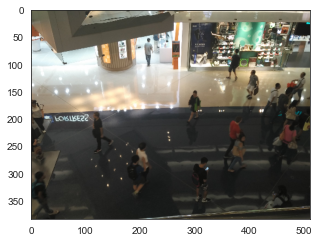

In [62]:
# lets take some sample images and plot them accordingly
example_img = 'train_1130.png'

# plot example image
img_array = load_image(os.path.join(IMAGE_DIR, example_img))
plt.figure(figsize=(5,4))
plt.imshow(img_array)
plt.show()

### 4. Visualising the bounding boxes of persons in an example scene

We'll create a helper function for visualising bounding boxes of all the persons detected in a scene. This will set the basis for a more advanced function later that can plot bounding boxes of persons, along with their pose features.

In [63]:
def draw_boxes(img, boxes, color=[255, 0, 0], t=2):
    """ Draw 3-pixel width bounding boxes on the given image array.
    
    Args:
        color: list of 3 int values for RGB. 
        t: Thickness of bounding box in pixels
    """
    # make our copy of our image to annotate on
    annotated_img = img.copy()
    
    # find number of boxes for given image
    num_boxes = boxes.shape[0]
    
    # convert bboxes to integers (if not already)
    bboxes = boxes.astype(int)

    # iterate through all boxes and plot
    for i in range(num_boxes):
        
        # get co-ords for current bbox
        x_min, y_min, w, h = bboxes[i]

        # find xmax & ymax for easier plotting
        x_max, y_max = x_min + w, y_min + h
        
        # plot bbox on image with desired thickness
        annotated_img[y_min:y_min + t, x_min:x_max] = color
        annotated_img[y_max:y_max + t, x_min:x_max] = color
        annotated_img[y_min:y_max, x_min:x_min + t] = color
        annotated_img[y_min:y_max, x_max:x_max + t] = color

    return annotated_img, num_boxes

Lets get the first bounding box for our sample image and plot it - this will confirm that our function above works:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


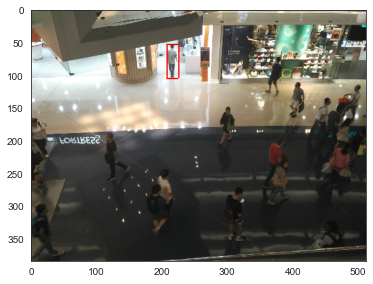

In [64]:
example_bbox = np.array([alphap_results.loc[alphap_results['image_id'] == 
                            example_img]['box'].apply(np.array).iloc[0]])

img, n_boxes = draw_boxes(img_array, example_bbox)
plt.figure(figsize=(6,5))
plt.imshow(img)
plt.show()

Good, that works for one person.... let's now try it for all of the people in the scene.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


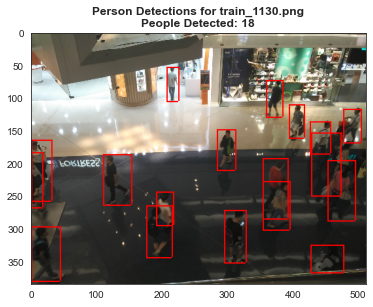

In [65]:
# get all bounding boxes for the example image
example_bboxes = alphap_results.loc[alphap_results['image_id'] == 
                                   example_img]['box'].apply(np.array)

# stack our seperate arrays into one large 2d array
example_bboxes = np.stack(example_bboxes, axis=0)

# obtain image with annotated bounding boxes
img, n_boxes = draw_boxes(img_array, example_bboxes)

# plot our resultant image with all annotations
plt.figure(figsize=(6,5))
plt.imshow(img)
plt.title(f"Person Detections for {example_img}\nPeople Detected: {example_bboxes.shape[0]}",
          weight="bold")
plt.show()

Lets amalgamate all of this into a helper function to plot any chosen image:

In [66]:
def plot_annotations(df, img_name, figsize=(6,5), image_dir=IMAGE_DIR):
    """ Helper function for plotting annotations for chosen images 
    
    Args:
        df (pd.DataFrame) : pandas dataframe with pose results.
        img_name (str) : string containing exact name of image to plot.
        figsize (tuple) : tuple of desired figure size to plot.
        image_dir (str) : string containing path to image directory.
    
    """
    # get all bounding boxes for the example image
    bboxes = df.loc[df['image_id'] == img_name]['box'].apply(np.array)

    # stack our seperate arrays into one large 2d array
    bboxes = np.stack(bboxes, axis=0)
    
    # load chosen image
    img_array = load_image(os.path.join(image_dir, img_name))
    
    img, n_boxes = draw_boxes(img_array, bboxes)
    plt.figure(figsize=figsize)
    plt.imshow(img)
    plt.title(f"Person Detections for {img_name}\nPeople Detected: {n_boxes}")
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


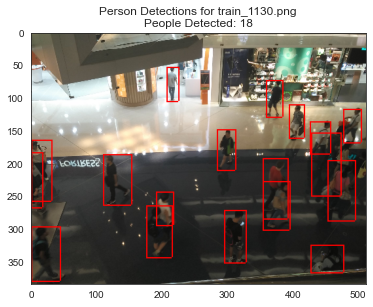

In [67]:
plot_annotations(alphap_results, 'train_1130.png')

Let's now plot a random sample of images from our data, just to get a good feel of what we're working with:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


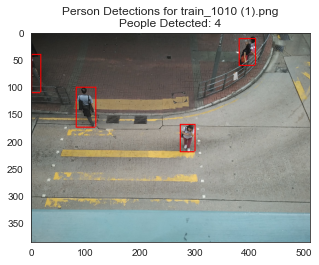

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


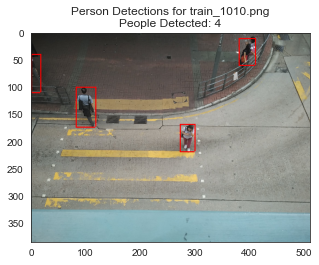

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


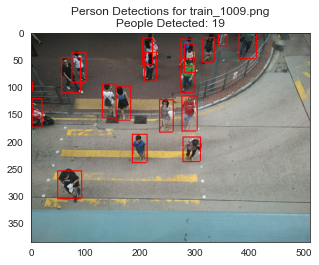

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


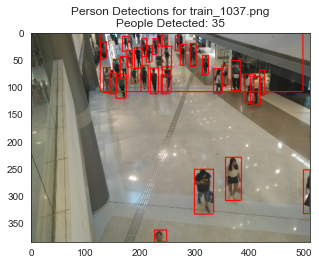

In [68]:
unique_filenames = alphap_results['image_id'].unique()

sampled_imgs = np.random.choice(unique_filenames, 4, replace=False)

for img in sampled_imgs:
    plot_annotations(alphap_results, img, figsize=(5,4))

#### A note about uncertain / erroneous predictions

As you may have noticed above, we sometimes get a very rogue 'large' bounding box. This corresponds to a false positive. Fortunately, AlphaPose gives us the score (confidence) of each prediction, and rogue predictions like this are usually very low confidence.

An example of one of these can be seen below:

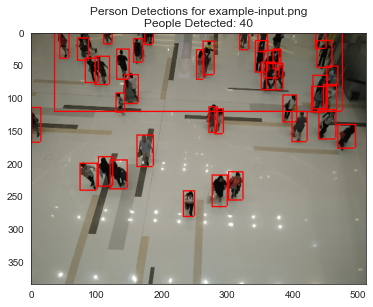

In [69]:
plot_annotations(alphap_results, 'example-input.png', figsize=(6,5))

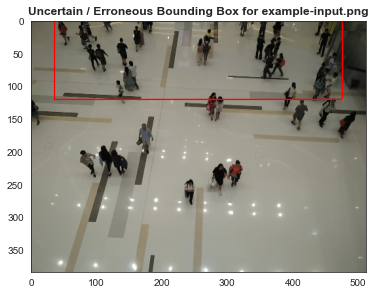

In [70]:
example_img = 'example-input.png'

tester = np.array([alphap_results.loc[alphap_results['image_id'] == 
                             example_img]['box'].iloc[-1]])

img_array = load_image(os.path.join(IMAGE_DIR, example_img))

img, n_boxes = draw_boxes(img_array, tester)
plt.figure(figsize=(6,5))
plt.imshow(img)
plt.title(f"Uncertain / Erroneous Bounding Box for {example_img}", weight="bold")
plt.show()

Lets compare this against the pose features constructed and plotted by the AlphaPose model:

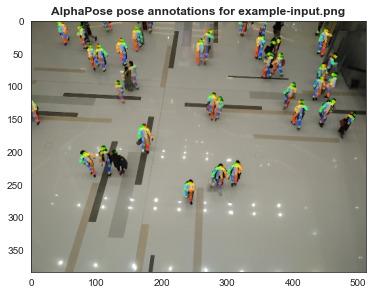

In [71]:
alphapose_results_img = load_image(os.path.join(ALPHAPOSE_RESULTS_DIR, example_img))
plt.figure(figsize=(6,5))
plt.imshow(alphapose_results_img)
plt.title(f"AlphaPose pose annotations for {example_img}", weight="bold")
plt.show()

You'll notice that these erroneous bounding boxes and pose features are not plotted on the image results produced by AlphaPose (lower image shown above). This is because the confidence level of the person object detector is used as a filter for plotting results - they have chosen an appropriate threshold and neglected all results below this score level.

In practice, we could simply select an appropriate threshold (perhaps 0.9-1.0), and only use predictions that score above this threshold, which could help remove false positives. This is something to think about for both the confidence of the person detector bounding box, and also the individual confidences for each of the pose features extracted.

Let's remove all low confidence predictions and plot the results again, to ensure we've removed those erroneous boxes:

In [72]:
THRESHOLD = 0.9
high_conf_preds = alphap_results.loc[alphap_results['score'] > THRESHOLD]

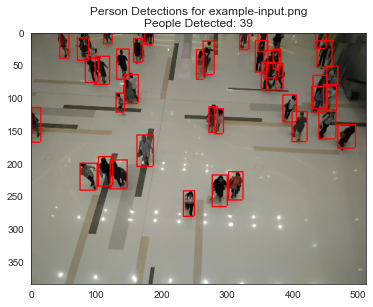

In [73]:
# plot preds, but simply pass our updated high confidence dataframe instead
plot_annotations(high_conf_preds, 'example-input.png', figsize=(6,5))

Good - the erroneous prediction has disappeared. We've chosen the threshold above as 0.9, but in practice we should experiment with this and make we've selected an appropriate value that doesn't impact our results for actual people in the scene.

### 5. Experimenting with some of the key-point body features

The default order for the COCO annotations of pose features (17 key body features) is:

    {0,  "Nose"},
    {1,  "LEye"},
    {2,  "REye"},
    {3,  "LEar"},
    {4,  "REar"},
    {5,  "LShoulder"},
    {6,  "RShoulder"},
    {7,  "LElbow"},
    {8,  "RElbow"},
    {9,  "LWrist"},
    {10, "RWrist"},
    {11, "LHip"},
    {12, "RHip"},
    {13, "LKnee"},
    {14, "Rknee"},
    {15, "LAnkle"},
    {16, "RAnkle"}
    
Lets assume we only want to see noses in our scene - we only need to consider the first two values in our key-points array, which correspond to the x and y co-ordinates of our nose respectively.

In [74]:
example_img = 'example-input.png'

# gather only the first persons pose features for this example
example_pose = np.array(alphap_results.loc[alphap_results['image_id'] == 
                                   example_img]['keypoints'].iloc[1])

In [75]:
# our first two features are the nose x and y coords:
example_pose[:2]

array([138.67724609,  31.95846367])

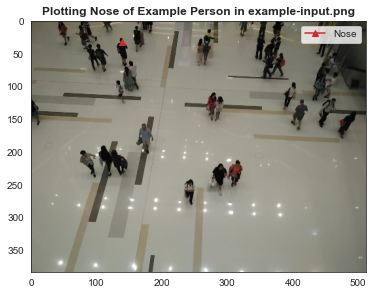

In [76]:
img_array = load_image(os.path.join(IMAGE_DIR, example_img))
plt.figure(figsize=(6,5))
plt.imshow(img_array)
plt.plot(example_pose[0], example_pose[1], marker='^', color='tab:red', label='Nose') 
plt.title(f"Plotting Nose of Example Person in {example_img}", weight="bold")
plt.legend()
plt.show()

Similarly, lets do the same for their feet:

In [77]:
# feet / ankles x-coords, y-coords are 3rd and 2nd last respectively
example_pose[-3:-1]

array([143.23631287,  65.69550323])

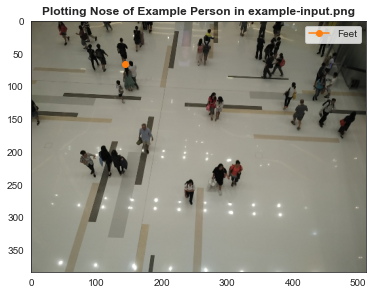

In [78]:
img_array = load_image(os.path.join(IMAGE_DIR, example_img))
plt.figure(figsize=(6,5))
plt.imshow(img_array)
plt.plot(example_pose[-3], example_pose[-2], marker='o', color='tab:orange', label='Feet') 
plt.title(f"Plotting Nose of Example Person in {example_img}", weight="bold")
plt.legend()
plt.show()

Lets plot both nose / head and feet:

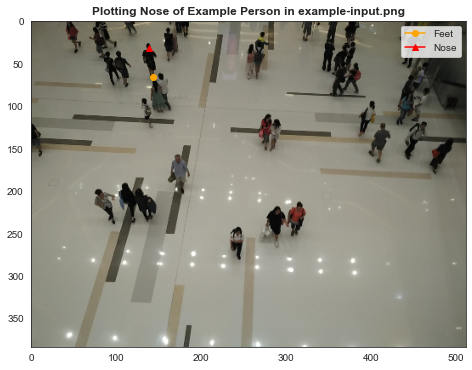

In [79]:
img_array = load_image(os.path.join(IMAGE_DIR, example_img))
plt.figure(figsize=(8,6))
plt.imshow(img_array)
plt.plot(example_pose[-3], example_pose[-2], marker='o', color='orange', label='Feet')
plt.plot(example_pose[0], example_pose[1], marker='^', color='red', label='Nose')
plt.title(f"Plotting Nose of Example Person in {example_img}", weight="bold")
plt.legend()
plt.show()

Easy.... We could do this all day... 

Now lets do this for all detected people in the scene:

In [80]:
# get all bounding boxes for the example image
example_poses = alphap_results.loc[alphap_results['image_id'] == 
                                   example_img]['keypoints'].apply(np.array)

# stack our seperate arrays into one large 2d array
example_poses = np.stack(example_poses, axis=0)

Similarly to the bounding boxes earlier, we now have 40 sets of key-point annotations:

In [81]:
example_poses.shape

(40, 51)

All we need to do is iterate through all of these and plot them individually for each person:

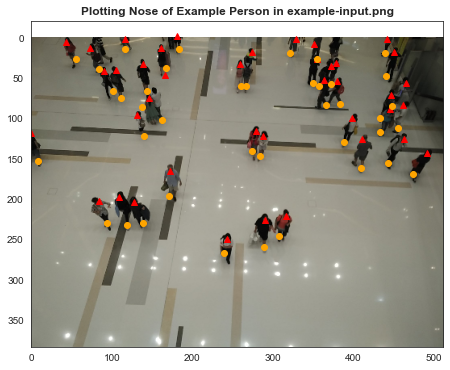

In [82]:
img_array = load_image(os.path.join(IMAGE_DIR, example_img))
plt.figure(figsize=(8,6))
plt.imshow(img_array)

# iterate through all people and plot thier nose & feet
for pose_feats in example_poses:
    plt.plot(pose_feats[-3], pose_feats[-2], marker='o', color='orange')
    plt.plot(pose_feats[0], pose_feats[1], marker='^', color='red')
    
plt.title(f"Plotting Nose of Example Person in {example_img}", weight="bold")
plt.show()

Now that we've covered the basics, performing our downstream tasks should be slightly easier, including:
- Distance estimation between all people detected in a scene.
- Status classification of people using poses
- Extraction of people / heads for feeding into our object detection model
- Analysis of crowds / groups / clusters of people.